In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
#import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

In [3]:
# OpenWeatherMap API Key
api_key = "99c6399e43122367611df043fd3e68f1"

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | hasaki
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 7 of Set 1 | giresun
Processing Record 8 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 9 of Set 1 | cabedelo
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | kapaa
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | visimo-utkinsk
City not found. Skipping...
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | sao desiderio
Processing Record 16 of Set 1 | geraldton
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | cidreira
Processing Record 19 of Set 1 | road town
Processing Record 20 of Set 1 | aken
Processing Record 21 of Set 

Processing Record 34 of Set 4 | elko
Processing Record 35 of Set 4 | ravar
Processing Record 36 of Set 4 | coolum beach
Processing Record 37 of Set 4 | longyearbyen
Processing Record 38 of Set 4 | alofi
Processing Record 39 of Set 4 | prosotsani
Processing Record 40 of Set 4 | mikkeli
Processing Record 41 of Set 4 | north bend
Processing Record 42 of Set 4 | karratha
Processing Record 43 of Set 4 | chuy
Processing Record 44 of Set 4 | praia da vitoria
Processing Record 45 of Set 4 | khatanga
Processing Record 46 of Set 4 | damavand
Processing Record 47 of Set 4 | sinop
Processing Record 48 of Set 4 | ruatoria
City not found. Skipping...
Processing Record 49 of Set 4 | san blas
Processing Record 0 of Set 5 | bandarbeyla
Processing Record 1 of Set 5 | borogontsy
Processing Record 2 of Set 5 | creel
Processing Record 3 of Set 5 | taga
Processing Record 4 of Set 5 | jalu
Processing Record 5 of Set 5 | deputatskiy
Processing Record 6 of Set 5 | hervey bay
Processing Record 7 of Set 5 | vait

Processing Record 19 of Set 8 | turayf
Processing Record 20 of Set 8 | talara
Processing Record 21 of Set 8 | araouane
Processing Record 22 of Set 8 | tual
Processing Record 23 of Set 8 | vardo
Processing Record 24 of Set 8 | bantou
Processing Record 25 of Set 8 | kracheh
City not found. Skipping...
Processing Record 26 of Set 8 | quelimane
Processing Record 27 of Set 8 | suao
City not found. Skipping...
Processing Record 28 of Set 8 | buta
Processing Record 29 of Set 8 | otane
Processing Record 30 of Set 8 | yar-sale
Processing Record 31 of Set 8 | zherdevka
Processing Record 32 of Set 8 | yendi
Processing Record 33 of Set 8 | rungata
City not found. Skipping...
Processing Record 34 of Set 8 | uvat
Processing Record 35 of Set 8 | lengshuitan
Processing Record 36 of Set 8 | socoltenango
Processing Record 37 of Set 8 | margate
Processing Record 38 of Set 8 | cockburn harbour
City not found. Skipping...
Processing Record 39 of Set 8 | nouakchott
Processing Record 40 of Set 8 | majene
Pro

Processing Record 8 of Set 12 | la rioja
Processing Record 9 of Set 12 | beringovskiy
Processing Record 10 of Set 12 | meulaboh
Processing Record 11 of Set 12 | comodoro rivadavia
Processing Record 12 of Set 12 | opobo
City not found. Skipping...
Processing Record 13 of Set 12 | bitkine
Processing Record 14 of Set 12 | saint-georges
Processing Record 15 of Set 12 | yuci
Processing Record 16 of Set 12 | poum
Processing Record 17 of Set 12 | sable-sur-sarthe
Processing Record 18 of Set 12 | robore
Processing Record 19 of Set 12 | duiwelskloof
Processing Record 20 of Set 12 | dispur
Processing Record 21 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 22 of Set 12 | pangkalanbuun
Processing Record 23 of Set 12 | ullapool
Processing Record 24 of Set 12 | obo
Processing Record 25 of Set 12 | batagay
Processing Record 26 of Set 12 | saquena
Processing Record 27 of Set 12 | blacksburg
Processing Record 28 of Set 12 | soligalich
Processing Record 29 of Set 12 | san carlos de b

In [7]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

output_data_file = "city-data.csv"

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          565
Cloudiness    565
Country       565
Date          565
Humidity      565
Lat           565
Lng           565
Max Temp      565
Wind Speed    565
dtype: int64

In [8]:
# Display the City Data Frame
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,yellowknife,75,CA,1537894800,87,62.45,-114.38,42.80,8.05
1,mataura,92,NZ,1537897993,71,-46.19,168.86,41.07,20.76
2,albany,90,US,1537897680,100,42.65,-73.75,57.92,18.34
3,hasaki,75,JP,1537895220,93,35.73,140.83,64.40,10.29
4,bethel,40,US,1537894380,100,60.79,-161.76,37.94,9.17


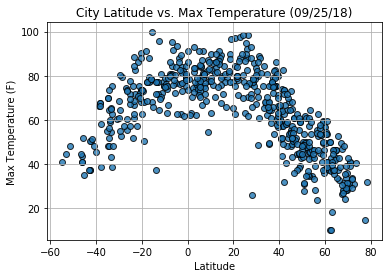

In [10]:
# Build scatter plot for latitude vs temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

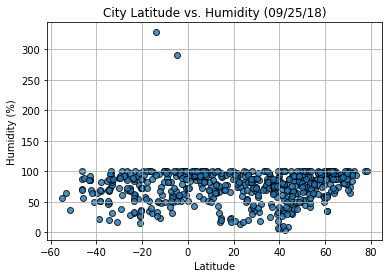

In [12]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

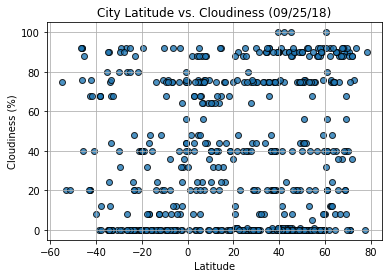

In [13]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

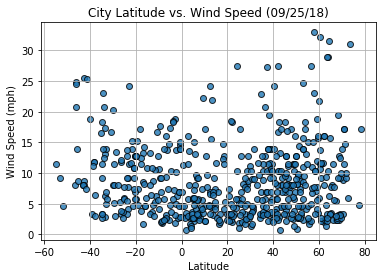

In [15]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()